In [54]:
import os
import tensorflow as tf
import visualkeras
from PIL import ImageFont
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, Conv2D, MaxPooling2D
from tensorflow.keras.applications.vgg16 import VGG16
from collections import defaultdict

In [58]:
color_map = defaultdict(dict)
color_map[Conv2D]['fill'] = '#DAF7A6'
color_map[Dropout]['fill'] = '#FFC300'
color_map[MaxPooling2D]['fill'] = '#FF5733'
color_map[Dense]['fill'] = '#29C9C9'
color_map[Flatten]['fill'] = '#900C3F'

font = ImageFont.truetype("arial.ttf", 16)

In [56]:
# getting h5 path
def get_model(model_name):
    model_h5_path = 'retinal_oct_model_'+model_name+'.h5'
    model_h5 = os.getcwd()+'/'+model_name+'/'+model_h5_path
    model = tf.keras.models.load_model(model_h5)
    model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
    return model

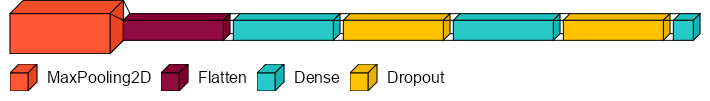

In [68]:
vgg16_e10b64_6 = get_model('vgg16_e10b64_6')
visualkeras.layered_view(
    model=vgg16_e10b64_6, 
    index_ignore=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], 
    legend=True,
    color_map=color_map,
    scale_xy=20,
    scale_z=1,
    max_z=100,
    font=font
    )

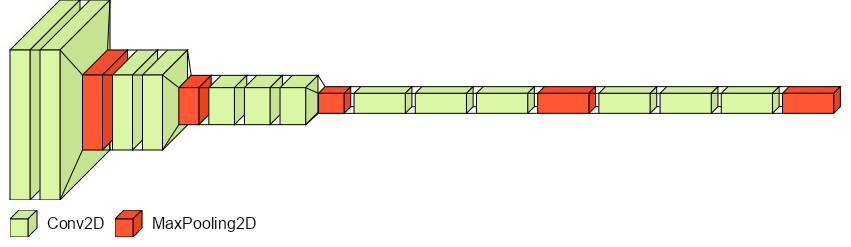

In [64]:
visualkeras.layered_view(
    model=vgg16_e10b64_6, 
    index_ignore=[18,19,20,21,22,23,24], 
    legend=True, 
    color_map=color_map, 
    scale_xy=1, 
    max_z=100,
    font=font
    )


In [26]:
vgg16 = VGG16(include_top= False, input_shape= (150, 150, 3), weights= 'imagenet')
model = Sequential()
for layer in vgg16.layers:
    model.add(layer)
for layer in model.layers:
    layer.trainable= False
model.add(Flatten(input_shape= (4, 4, 512)))
model.add(Dropout(0.2))
model.add(Dense(4,activation='softmax'))


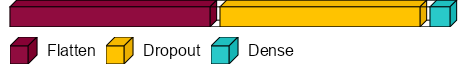

In [66]:
visualkeras.layered_view(
    model=model, 
    index_ignore=[0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17], 
    legend=True, 
    color_map=color_map, 
    max_z=200,
    font=font
    )